# Setup Environment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')

Matplotlib is building the font cache; this may take a moment.


# Load and Explore Dataset

In [2]:
df = pd.read_csv('workspace/superstore_dataset2012.csv')
print(df.head())
print(df.info())
print(df.isnull().sum())

   Row ID        Order ID Order Date Ship Date       Ship Mode Customer ID  \
0   21896   ID-2012-71858   1/2/2012  7/2/2012  Standard Class    CP-12085   
1    4323  MX-2012-154459   1/2/2012  6/2/2012  Standard Class    JF-15190   
2    2829  MX-2012-114461   1/2/2012  5/2/2012  Standard Class    RM-19375   
3    2828  MX-2012-114461   1/2/2012  5/2/2012  Standard Class    RM-19375   
4    6762  MX-2012-151904   1/2/2012  3/2/2012     First Class    DJ-13420   

    Customer Name    Segment           City      State  ...       Product ID  \
0  Cathy Prescott  Corporate        Jakarta    Jakarta  ...  TEC-PH-10003784   
1    Jamie Frazer   Consumer       Santiago   Santiago  ...  TEC-PH-10002102   
2   Raymond Messe   Consumer      Escuintla  Escuintla  ...  TEC-AC-10002760   
3   Raymond Messe   Consumer      Escuintla  Escuintla  ...  FUR-CH-10001423   
4       Denny Joy  Corporate  Villa Canales  Guatemala  ...  OFF-PA-10003571   

          Category Sub-Category                   

# Data Preparation

In [5]:
# Convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='mixed')

# Handle nulls if any
df['Postal Code'].fillna('Unknown', inplace=True)  # Since it's string

print("Data prepared.")

Data prepared.


# Univariate Visualization with Matplotlib

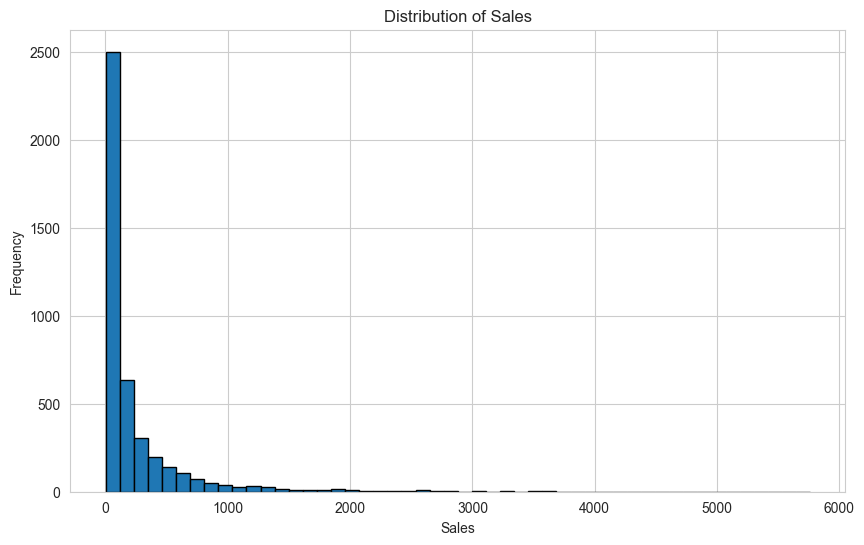

In [6]:
# Histogram of Sales
plt.figure(figsize=(10,6))
plt.hist(df['Sales'], bins=50, edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Conclusion: The sales distribution is right-skewed, indicating most transactions are for lower amounts, with some high-value sales.

# Univariate Visualization with Seaborn

/var/folders/xq/5j3f83dj1lxbj2dmw43c63s80000gn/T/ipykernel_71073/884743783.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y='Profit', data=df, palette='Set2')


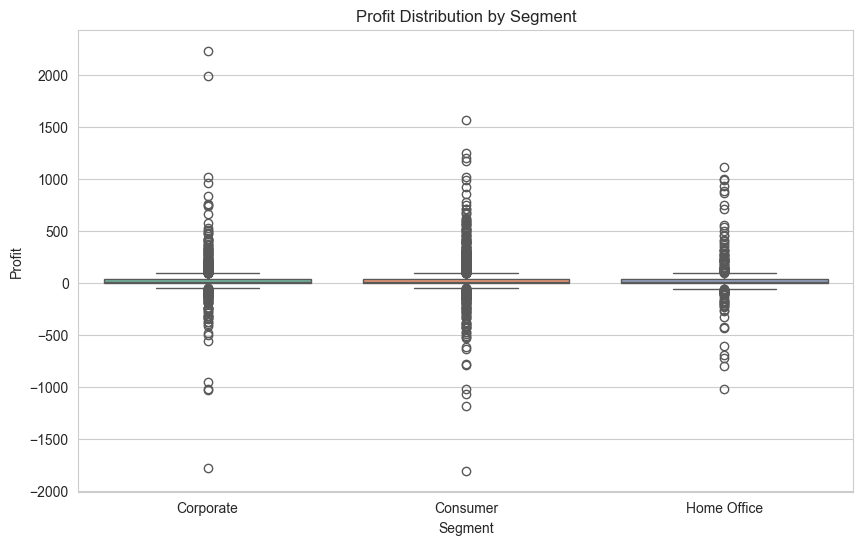

In [7]:
# Boxplot of Profit by Segment
plt.figure(figsize=(10,6))
sns.boxplot(x='Segment', y='Profit', data=df, palette='Set2')
plt.title('Profit Distribution by Segment')
plt.show()

# Conclusion: The Consumer segment shows the highest variability in profits, with some outliers indicating potential losses or high gains.

# Bivariate Visualization with Matplotlib

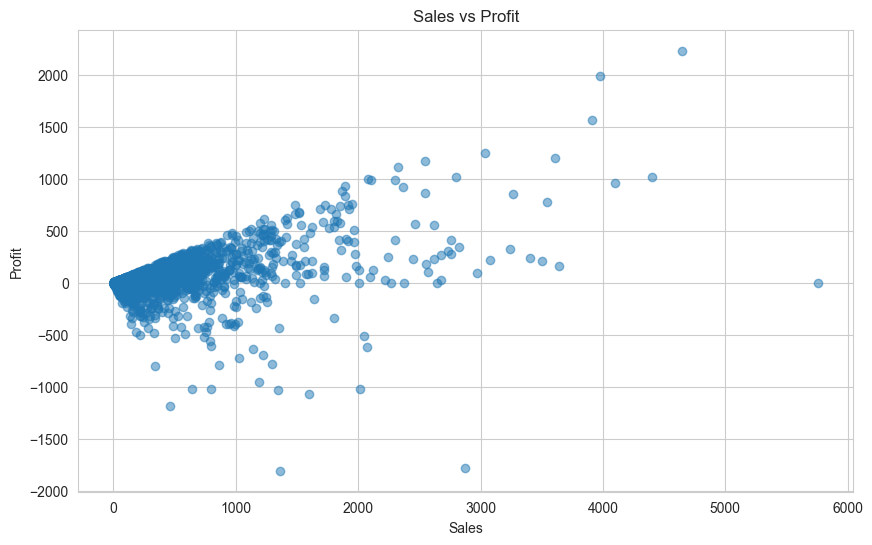

In [8]:
# Scatter plot Sales vs Profit
plt.figure(figsize=(10,6))
plt.scatter(df['Sales'], df['Profit'], alpha=0.5)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

# Conclusion: There is a positive correlation between sales and profit, but some points show negative profits even at higher sales, possibly due to discounts.

# Bivariate Visualization with Seaborn

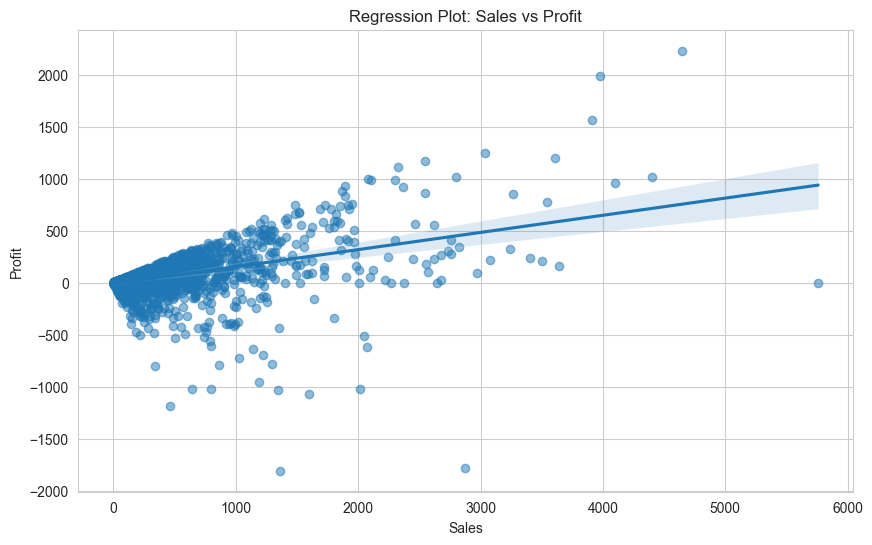

In [9]:
# Regplot Sales vs Profit
plt.figure(figsize=(10,6))
sns.regplot(x='Sales', y='Profit', data=df, scatter_kws={'alpha':0.5})
plt.title('Regression Plot: Sales vs Profit')
plt.show()

# Conclusion: The regression line confirms a positive relationship, but the spread suggests other factors like discount affect profit.

# Multivariate Visualization with Seaborn

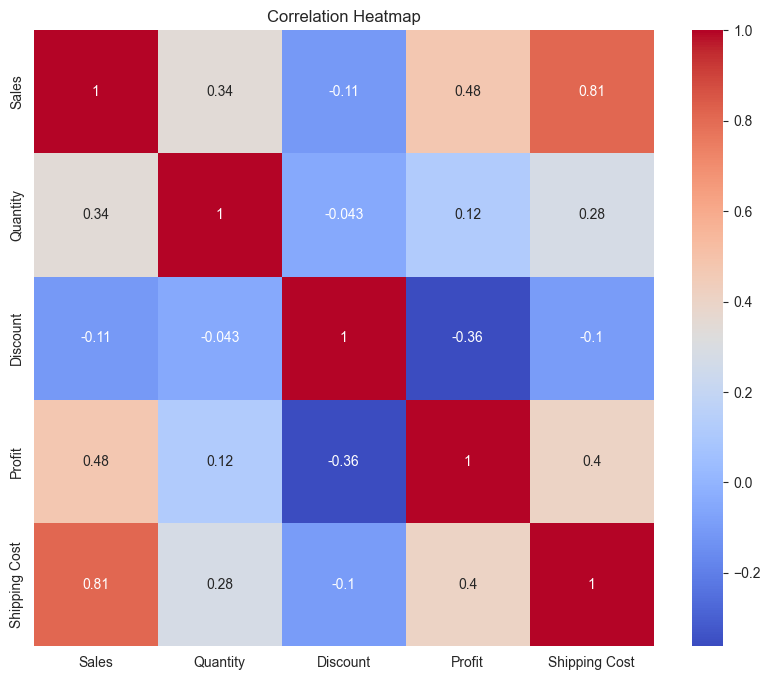

In [10]:
# Heatmap of correlations
numeric_cols = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']
corr = df[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Conclusion: Sales and Profit are positively correlated (0.48), while Discount is negatively correlated with Profit (-0.22), indicating discounts reduce profitability.

# Organize Visualizations in Subplots

/var/folders/xq/5j3f83dj1lxbj2dmw43c63s80000gn/T/ipykernel_71073/180371430.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Profit', data=df, ax=axes[0,1], palette='Set3')


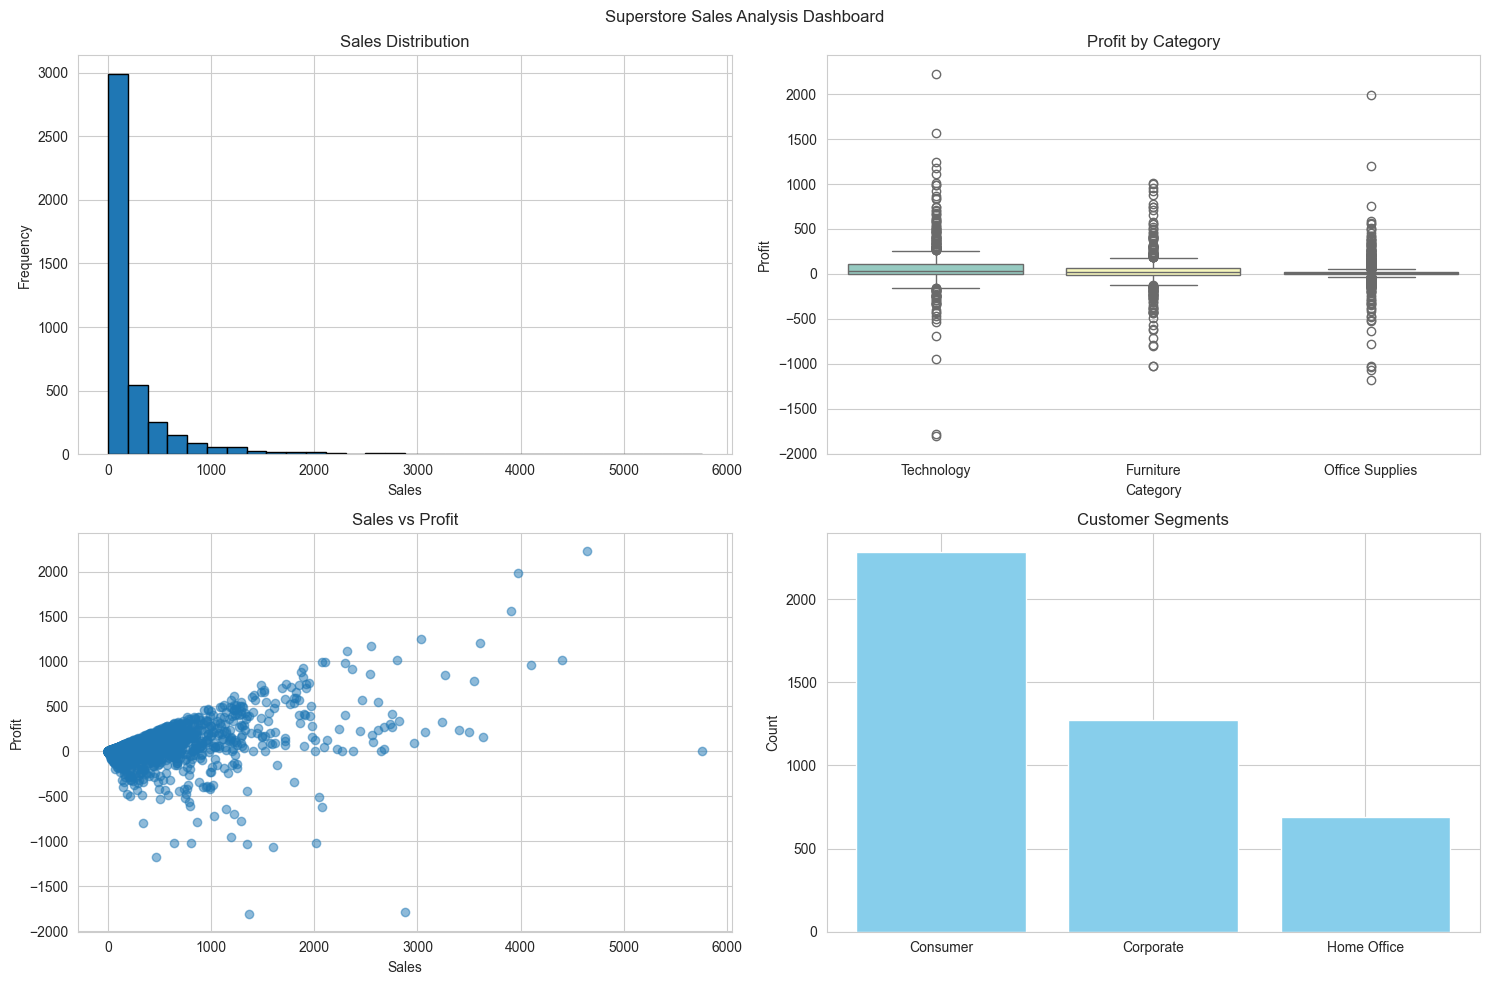

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Superstore Sales Analysis Dashboard')

# Subplot 1: Histogram Sales
axes[0,0].hist(df['Sales'], bins=30, edgecolor='black')
axes[0,0].set_title('Sales Distribution')
axes[0,0].set_xlabel('Sales')
axes[0,0].set_ylabel('Frequency')

# Subplot 2: Boxplot Profit by Category
sns.boxplot(x='Category', y='Profit', data=df, ax=axes[0,1], palette='Set3')
axes[0,1].set_title('Profit by Category')

# Subplot 3: Scatter Sales vs Profit
axes[1,0].scatter(df['Sales'], df['Profit'], alpha=0.5)
axes[1,0].set_title('Sales vs Profit')
axes[1,0].set_xlabel('Sales')
axes[1,0].set_ylabel('Profit')

# Subplot 4: Bar chart of Segment counts
segment_counts = df['Segment'].value_counts()
axes[1,1].bar(segment_counts.index, segment_counts.values, color='skyblue')
axes[1,1].set_title('Customer Segments')
axes[1,1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Conclusion: The dashboard provides a comprehensive view of sales distributions, profitability across categories, sales-profit relationships, and customer segment distribution, aiding in strategic decisions.

# Save Visualization

In [12]:
# Save the dashboard
fig.savefig('superstore_dashboard.png', dpi=300, bbox_inches='tight')
print("Dashboard saved as superstore_dashboard.png")

# Final comments: This analysis reveals key insights into the superstore's performance, highlighting areas for improvement like discount strategies to boost profitability.

Dashboard saved as superstore_dashboard.png
